In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 24)           672         batch_normalization_1[0][0]      
____________________________________________________________________________________

213605/213605 [==============================] - 13s 59us/step - loss: 12.2801 - rec_loss: 21.2853 - kl_loss: 2.8600 - val_loss: 12.4441 - val_rec_loss: 21.6861 - val_kl_loss: 2.7974
Epoch 18/150
213605/213605 [==============================] - 13s 62us/step - loss: 12.2569 - rec_loss: 21.2237 - kl_loss: 2.8817 - val_loss: 12.1151 - val_rec_loss: 20.9394 - val_kl_loss: 2.8819
Epoch 19/150
213605/213605 [==============================] - 13s 62us/step - loss: 12.2079 - rec_loss: 21.1042 - kl_loss: 2.9047 - val_loss: 12.3758 - val_rec_loss: 21.5143 - val_kl_loss: 2.8223
Epoch 20/150
213605/213605 [==============================] - 13s 62us/step - loss: 12.1704 - rec_loss: 21.0307 - kl_loss: 2.9060 - val_loss: 12.1059 - val_rec_loss: 20.9759 - val_kl_loss: 2.8386
Epoch 21/150
213605/213605 [==============================] - 13s 59us/step - loss: 12.1664 - rec_loss: 21.0253 - kl_loss: 2.9060 - val_loss: 12.3450 - val_rec_loss: 21.3268 - val_kl_loss: 2.9448
Epoch 22/150
213605/213605 [=====

Epoch 59/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.6856 - rec_loss: 19.7709 - kl_loss: 3.1691 - val_loss: 11.9146 - val_rec_loss: 20.2869 - val_kl_loss: 3.0998
Epoch 60/150
213605/213605 [==============================] - 12s 57us/step - loss: 11.6809 - rec_loss: 19.7457 - kl_loss: 3.1816 - val_loss: 11.8179 - val_rec_loss: 19.9950 - val_kl_loss: 3.2098
Epoch 61/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.6536 - rec_loss: 19.6561 - kl_loss: 3.2106 - val_loss: 13.0321 - val_rec_loss: 22.4459 - val_kl_loss: 3.1632
Epoch 62/150
213605/213605 [==============================] - 13s 59us/step - loss: 11.7217 - rec_loss: 19.7986 - kl_loss: 3.1938 - val_loss: 11.5816 - val_rec_loss: 19.5943 - val_kl_loss: 3.1053
Epoch 63/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.6980 - rec_loss: 19.7398 - kl_loss: 3.1969 - val_loss: 11.6009 - val_rec_loss: 19.5113 - val_kl_loss: 3.2504
Epoch 64/150
213605/

Epoch 101/150
213605/213605 [==============================] - 13s 59us/step - loss: 11.5536 - rec_loss: 19.3268 - kl_loss: 3.3141 - val_loss: 12.2242 - val_rec_loss: 20.7227 - val_kl_loss: 3.2597
Epoch 102/150
213605/213605 [==============================] - 12s 57us/step - loss: 11.5455 - rec_loss: 19.2879 - kl_loss: 3.3397 - val_loss: 11.7797 - val_rec_loss: 19.7134 - val_kl_loss: 3.3751
Epoch 103/150
213605/213605 [==============================] - 13s 59us/step - loss: 11.5196 - rec_loss: 19.2522 - kl_loss: 3.3272 - val_loss: 11.4734 - val_rec_loss: 19.1815 - val_kl_loss: 3.3119
Epoch 104/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.4829 - rec_loss: 19.1657 - kl_loss: 3.3401 - val_loss: 11.5506 - val_rec_loss: 19.3387 - val_kl_loss: 3.3044
Epoch 105/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.4860 - rec_loss: 19.1447 - kl_loss: 3.3597 - val_loss: 11.2441 - val_rec_loss: 18.6393 - val_kl_loss: 3.3756
Epoch 106/150
2

213605/213605 [==============================] - 12s 57us/step - loss: 11.4933 - rec_loss: 19.1260 - kl_loss: 3.3731 - val_loss: 12.0863 - val_rec_loss: 20.3800 - val_kl_loss: 3.2922
Epoch 143/150
213605/213605 [==============================] - 12s 57us/step - loss: 11.6350 - rec_loss: 19.4185 - kl_loss: 3.3531 - val_loss: 11.9937 - val_rec_loss: 20.2548 - val_kl_loss: 3.2416
Epoch 144/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.6008 - rec_loss: 19.3694 - kl_loss: 3.3404 - val_loss: 11.4530 - val_rec_loss: 19.0415 - val_kl_loss: 3.3707
Epoch 145/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.6159 - rec_loss: 19.3869 - kl_loss: 3.3503 - val_loss: 12.3215 - val_rec_loss: 20.7888 - val_kl_loss: 3.3397
Epoch 146/150
213605/213605 [==============================] - 12s 55us/step - loss: 11.5828 - rec_loss: 19.3155 - kl_loss: 3.3462 - val_loss: 12.1484 - val_rec_loss: 20.5338 - val_kl_loss: 3.2490
Epoch 147/150
213605/213605 [

213605/213605 [==============================] - 36s 167us/step - loss: 0.0052 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 44/50
213605/213605 [==============================] - 35s 166us/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 45/50
213605/213605 [==============================] - 35s 165us/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 46/50
213605/213605 [==============================] - 35s 164us/step - loss: 0.0051 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 47/50
213605/213605 [==============================] - 35s 164us/step - loss: 0.0051 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 48/50
213605/213605 [==============================] - 35s 164us/step - loss: 0.0051 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 49/50
213605/213605 [==============================] - 35s 165us/step - loss: 0.0051 - accurac

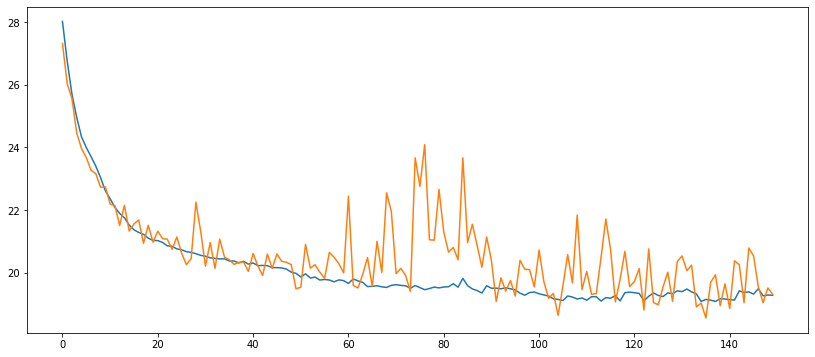

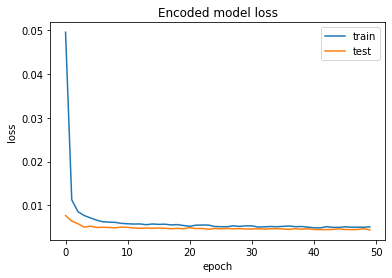

Overall accuracy of Convolutional Neural Network model: 0.9992415943372377


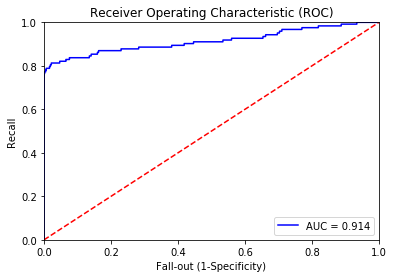

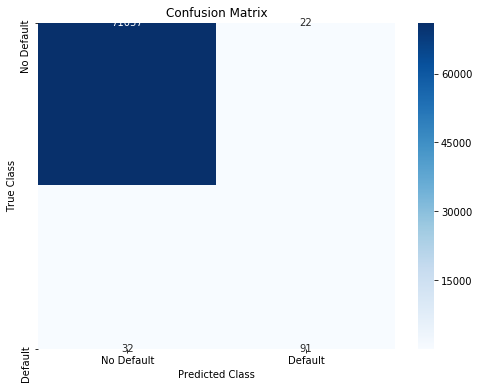

AUC(ROC): 0.8697639418043612
Precision: 0.8053097345132744
Recall: 0.7398373983739838
F1 score: 0.7711864406779662
False positives: 22
True positives: 91
False negatives: 32
True negatives: 71057
Fold #2
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
______________________________________________________________________________________

213605/213605 [==============================] - 12s 58us/step - loss: 12.1907 - rec_loss: 21.2739 - kl_loss: 2.7031 - val_loss: 12.4636 - val_rec_loss: 21.9709 - val_kl_loss: 2.5563
Epoch 17/150
213605/213605 [==============================] - 12s 57us/step - loss: 12.1082 - rec_loss: 21.0855 - kl_loss: 2.7275 - val_loss: 12.2363 - val_rec_loss: 21.4301 - val_kl_loss: 2.6474
Epoch 18/150
213605/213605 [==============================] - 12s 58us/step - loss: 12.0616 - rec_loss: 21.0118 - kl_loss: 2.7105 - val_loss: 12.1818 - val_rec_loss: 21.3408 - val_kl_loss: 2.6415
Epoch 19/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.9999 - rec_loss: 20.8848 - kl_loss: 2.7262 - val_loss: 12.1943 - val_rec_loss: 21.3503 - val_kl_loss: 2.6533
Epoch 20/150
213605/213605 [==============================] - 12s 58us/step - loss: 12.0207 - rec_loss: 20.9045 - kl_loss: 2.7320 - val_loss: 12.0463 - val_rec_loss: 20.9848 - val_kl_loss: 2.7003
Epoch 21/150
213605/213605 [=====

213605/213605 [==============================] - 12s 58us/step - loss: 11.4537 - rec_loss: 19.5465 - kl_loss: 2.9206 - val_loss: 11.8452 - val_rec_loss: 20.3508 - val_kl_loss: 2.8986
Epoch 58/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.4161 - rec_loss: 19.4604 - kl_loss: 2.9316 - val_loss: 11.3466 - val_rec_loss: 19.3362 - val_kl_loss: 2.9192
Epoch 59/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.3998 - rec_loss: 19.4166 - kl_loss: 2.9363 - val_loss: 11.2680 - val_rec_loss: 19.2501 - val_kl_loss: 2.8525
Epoch 60/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.4214 - rec_loss: 19.4785 - kl_loss: 2.9274 - val_loss: 11.2163 - val_rec_loss: 19.1309 - val_kl_loss: 2.8711
Epoch 61/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.4200 - rec_loss: 19.4450 - kl_loss: 2.9542 - val_loss: 11.5045 - val_rec_loss: 19.6186 - val_kl_loss: 2.9450
Epoch 62/150
213605/213605 [=====

213605/213605 [==============================] - 12s 58us/step - loss: 11.2792 - rec_loss: 19.0926 - kl_loss: 3.0006 - val_loss: 11.0837 - val_rec_loss: 18.8015 - val_kl_loss: 2.9003
Epoch 99/150
213605/213605 [==============================] - 12s 57us/step - loss: 11.3135 - rec_loss: 19.1718 - kl_loss: 2.9927 - val_loss: 11.4258 - val_rec_loss: 19.4291 - val_kl_loss: 2.9583
Epoch 100/150
213605/213605 [==============================] - 12s 57us/step - loss: 11.2763 - rec_loss: 19.0920 - kl_loss: 2.9937 - val_loss: 11.1289 - val_rec_loss: 18.8228 - val_kl_loss: 2.9701
Epoch 101/150
213605/213605 [==============================] - 12s 57us/step - loss: 11.2619 - rec_loss: 19.0760 - kl_loss: 2.9824 - val_loss: 11.1453 - val_rec_loss: 18.9358 - val_kl_loss: 2.8872
Epoch 102/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.2829 - rec_loss: 19.0993 - kl_loss: 2.9980 - val_loss: 11.0493 - val_rec_loss: 18.7281 - val_kl_loss: 2.9057
Epoch 103/150
213605/213605 [=

213605/213605 [==============================] - 12s 57us/step - loss: 11.4695 - rec_loss: 19.3729 - kl_loss: 3.0430 - val_loss: 11.6487 - val_rec_loss: 19.6283 - val_kl_loss: 3.1141
Epoch 140/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.2623 - rec_loss: 18.9536 - kl_loss: 3.0421 - val_loss: 11.1131 - val_rec_loss: 18.7207 - val_kl_loss: 3.0054
Epoch 141/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.2097 - rec_loss: 18.9087 - kl_loss: 3.0202 - val_loss: 10.9140 - val_rec_loss: 18.3284 - val_kl_loss: 3.0128
Epoch 142/150
213605/213605 [==============================] - 12s 57us/step - loss: 11.2254 - rec_loss: 18.9143 - kl_loss: 3.0494 - val_loss: 11.1923 - val_rec_loss: 18.9426 - val_kl_loss: 2.9581
Epoch 143/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.2447 - rec_loss: 18.9901 - kl_loss: 3.0053 - val_loss: 11.1760 - val_rec_loss: 18.8544 - val_kl_loss: 3.0112
Epoch 144/150
213605/213605 [

213605/213605 [==============================] - 34s 160us/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 40/50
213605/213605 [==============================] - 34s 160us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 41/50
213605/213605 [==============================] - 34s 161us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 42/50
213605/213605 [==============================] - 35s 162us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 43/50
213605/213605 [==============================] - 35s 162us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 44/50
213605/213605 [==============================] - 35s 162us/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 45/50
213605/213605 [==============================] - 35s 163us/step - loss: 0.0045 - accurac

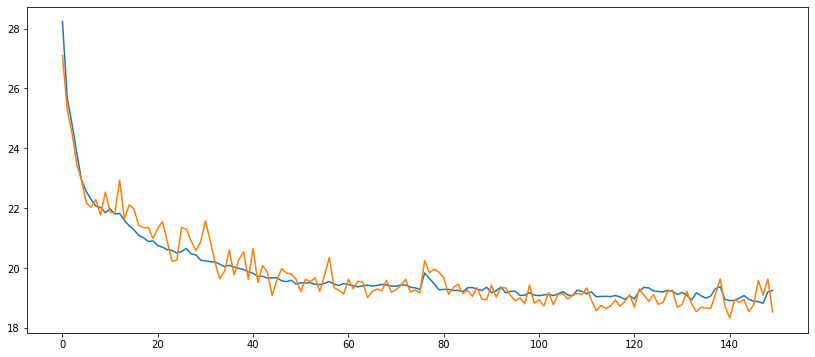

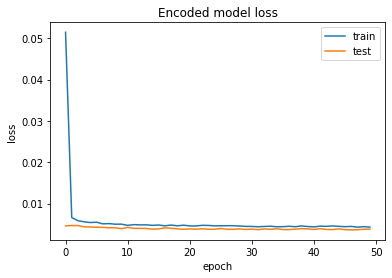

Overall accuracy of Convolutional Neural Network model: 0.9993960843796522


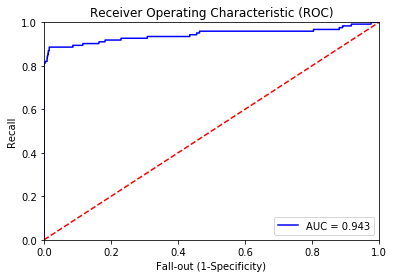

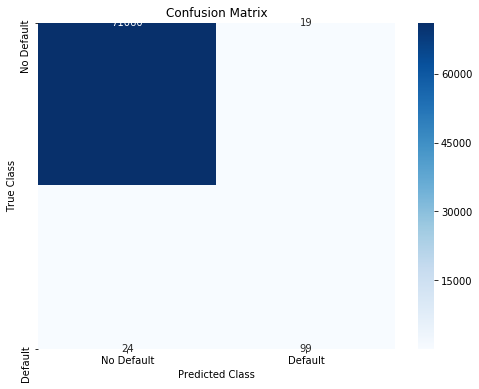

AUC(ROC): 0.902305370287063
Precision: 0.8389830508474576
Recall: 0.8048780487804879
F1 score: 0.8215767634854773
False positives: 19
True positives: 99
False negatives: 24
True negatives: 71060
Fold #3
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_______________________________________________________________________________________

213605/213605 [==============================] - 12s 56us/step - loss: 12.0366 - rec_loss: 21.0179 - kl_loss: 2.6915 - val_loss: 11.7944 - val_rec_loss: 20.5770 - val_kl_loss: 2.6479
Epoch 17/150
213605/213605 [==============================] - 12s 57us/step - loss: 12.0295 - rec_loss: 20.9918 - kl_loss: 2.7040 - val_loss: 11.7296 - val_rec_loss: 20.4238 - val_kl_loss: 2.6715
Epoch 18/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.9599 - rec_loss: 20.8269 - kl_loss: 2.7301 - val_loss: 11.7565 - val_rec_loss: 20.4806 - val_kl_loss: 2.6674
Epoch 19/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.9267 - rec_loss: 20.7626 - kl_loss: 2.7316 - val_loss: 11.6560 - val_rec_loss: 20.2499 - val_kl_loss: 2.7003
Epoch 20/150
213605/213605 [==============================] - 12s 57us/step - loss: 11.9152 - rec_loss: 20.7229 - kl_loss: 2.7471 - val_loss: 11.7980 - val_rec_loss: 20.4685 - val_kl_loss: 2.7611
Epoch 21/150
213605/213605 [=====

213605/213605 [==============================] - 12s 57us/step - loss: 11.4365 - rec_loss: 19.6326 - kl_loss: 2.8754 - val_loss: 12.5617 - val_rec_loss: 21.8540 - val_kl_loss: 2.9083
Epoch 58/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.4726 - rec_loss: 19.7098 - kl_loss: 2.8705 - val_loss: 11.5598 - val_rec_loss: 19.8880 - val_kl_loss: 2.8792
Epoch 59/150
213605/213605 [==============================] - 12s 58us/step - loss: 11.4590 - rec_loss: 19.6871 - kl_loss: 2.8726 - val_loss: 11.3960 - val_rec_loss: 19.5699 - val_kl_loss: 2.8584
Epoch 60/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.4561 - rec_loss: 19.6557 - kl_loss: 2.8894 - val_loss: 11.6170 - val_rec_loss: 19.9793 - val_kl_loss: 2.8882
Epoch 61/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.4468 - rec_loss: 19.6220 - kl_loss: 2.8962 - val_loss: 11.4161 - val_rec_loss: 19.5694 - val_kl_loss: 2.8911
Epoch 62/150
213605/213605 [=====

Epoch 99/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.4163 - rec_loss: 19.4511 - kl_loss: 2.9772 - val_loss: 11.5598 - val_rec_loss: 19.7872 - val_kl_loss: 2.9405
Epoch 100/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.4283 - rec_loss: 19.4811 - kl_loss: 2.9792 - val_loss: 11.5376 - val_rec_loss: 19.7295 - val_kl_loss: 2.9528
Epoch 101/150
213605/213605 [==============================] - 12s 57us/step - loss: 11.3949 - rec_loss: 19.3998 - kl_loss: 2.9938 - val_loss: 11.2416 - val_rec_loss: 19.0820 - val_kl_loss: 3.0125
Epoch 102/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.3309 - rec_loss: 19.2279 - kl_loss: 3.0369 - val_loss: 11.3011 - val_rec_loss: 19.1678 - val_kl_loss: 3.0277
Epoch 103/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.3696 - rec_loss: 19.3079 - kl_loss: 3.0229 - val_loss: 11.4390 - val_rec_loss: 19.4540 - val_kl_loss: 2.9994
Epoch 104/150
21

213605/213605 [==============================] - 12s 56us/step - loss: 11.1246 - rec_loss: 18.7858 - kl_loss: 3.0407 - val_loss: 12.2244 - val_rec_loss: 21.0586 - val_kl_loss: 2.9776
Epoch 141/150
213605/213605 [==============================] - 12s 56us/step - loss: 11.1047 - rec_loss: 18.7450 - kl_loss: 3.0409 - val_loss: 11.3525 - val_rec_loss: 19.4396 - val_kl_loss: 2.8528
Epoch 142/150
213605/213605 [==============================] - 12s 55us/step - loss: 11.1195 - rec_loss: 18.7732 - kl_loss: 3.0392 - val_loss: 11.6089 - val_rec_loss: 19.7424 - val_kl_loss: 3.0481
Epoch 143/150
213605/213605 [==============================] - 12s 54us/step - loss: 11.1522 - rec_loss: 18.8457 - kl_loss: 3.0384 - val_loss: 12.1244 - val_rec_loss: 20.7743 - val_kl_loss: 3.0432
Epoch 144/150
213605/213605 [==============================] - 12s 54us/step - loss: 11.1813 - rec_loss: 18.9193 - kl_loss: 3.0221 - val_loss: 11.1123 - val_rec_loss: 18.7678 - val_kl_loss: 3.0374
Epoch 145/150
213605/213605 [

213605/213605 [==============================] - 36s 167us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 41/50
213605/213605 [==============================] - 36s 167us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 42/50
213605/213605 [==============================] - 36s 167us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 43/50
213605/213605 [==============================] - 36s 167us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 44/50
213605/213605 [==============================] - 36s 167us/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 45/50
213605/213605 [==============================] - 36s 167us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 46/50
213605/213605 [==============================] - 35s 162us/step - loss: 0.0049 - accurac

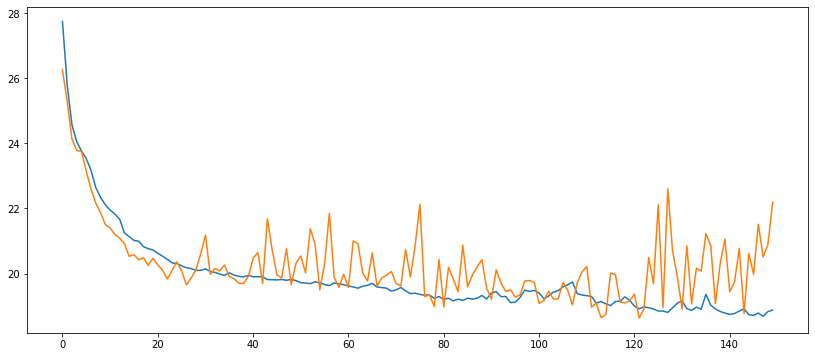

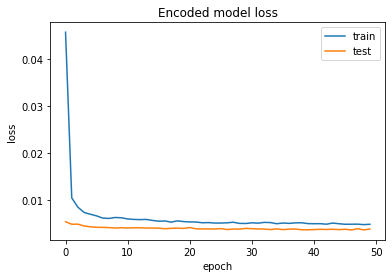

Overall accuracy of Convolutional Neural Network model: 0.9993960843796522


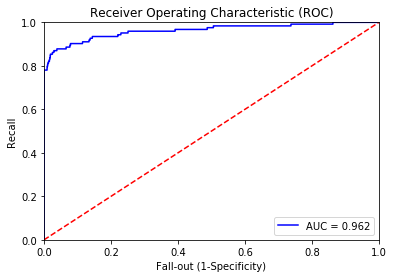

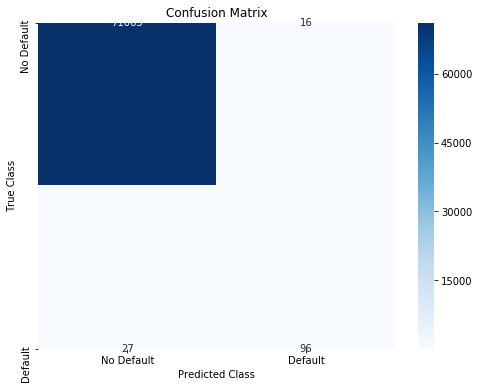

AUC(ROC): 0.890131351615293
Precision: 0.8571428571428571
Recall: 0.7804878048780488
F1 score: 0.8170212765957446
False positives: 16
True positives: 96
False negatives: 27
True negatives: 71063
Fold #4
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_______________________________________________________________________________________

213606/213606 [==============================] - 12s 56us/step - loss: 12.1678 - rec_loss: 21.0376 - kl_loss: 2.7483 - val_loss: 14.7395 - val_rec_loss: 26.2434 - val_kl_loss: 2.6904
Epoch 17/150
213606/213606 [==============================] - 12s 56us/step - loss: 12.1158 - rec_loss: 20.9510 - kl_loss: 2.7396 - val_loss: 12.3788 - val_rec_loss: 21.4687 - val_kl_loss: 2.7323
Epoch 18/150
213606/213606 [==============================] - 12s 56us/step - loss: 12.0519 - rec_loss: 20.7980 - kl_loss: 2.7531 - val_loss: 13.2573 - val_rec_loss: 23.2066 - val_kl_loss: 2.7372
Epoch 19/150
213606/213606 [==============================] - 12s 56us/step - loss: 12.1305 - rec_loss: 20.9458 - kl_loss: 2.7501 - val_loss: 15.1243 - val_rec_loss: 26.9921 - val_kl_loss: 2.6944
Epoch 20/150
213606/213606 [==============================] - 12s 56us/step - loss: 12.0261 - rec_loss: 20.7588 - kl_loss: 2.7477 - val_loss: 13.9065 - val_rec_loss: 24.5187 - val_kl_loss: 2.7326
Epoch 21/150
213606/213606 [=====

Epoch 58/150
213606/213606 [==============================] - 12s 58us/step - loss: 11.5659 - rec_loss: 19.7763 - kl_loss: 2.9194 - val_loss: 12.4662 - val_rec_loss: 21.6433 - val_kl_loss: 2.8437
Epoch 59/150
213606/213606 [==============================] - 12s 58us/step - loss: 11.5521 - rec_loss: 19.7554 - kl_loss: 2.9185 - val_loss: 13.9155 - val_rec_loss: 24.5251 - val_kl_loss: 2.8744
Epoch 60/150
213606/213606 [==============================] - 12s 57us/step - loss: 11.5531 - rec_loss: 19.7454 - kl_loss: 2.9355 - val_loss: 11.5280 - val_rec_loss: 19.6209 - val_kl_loss: 3.0120
Epoch 61/150
213606/213606 [==============================] - 12s 57us/step - loss: 11.5621 - rec_loss: 19.7686 - kl_loss: 2.9304 - val_loss: 14.0949 - val_rec_loss: 24.7208 - val_kl_loss: 3.0304
Epoch 62/150
213606/213606 [==============================] - 12s 57us/step - loss: 11.5348 - rec_loss: 19.7113 - kl_loss: 2.9233 - val_loss: 14.1230 - val_rec_loss: 24.8372 - val_kl_loss: 2.9712
Epoch 63/150
213606/

Epoch 100/150
213606/213606 [==============================] - 12s 55us/step - loss: 11.4616 - rec_loss: 19.5149 - kl_loss: 2.9878 - val_loss: 13.7414 - val_rec_loss: 24.1212 - val_kl_loss: 2.9352
Epoch 101/150
213606/213606 [==============================] - 12s 55us/step - loss: 11.4200 - rec_loss: 19.4267 - kl_loss: 2.9923 - val_loss: 16.1408 - val_rec_loss: 28.9585 - val_kl_loss: 2.9074
Epoch 102/150
213606/213606 [==============================] - 12s 55us/step - loss: 11.3918 - rec_loss: 19.3546 - kl_loss: 3.0106 - val_loss: 12.8540 - val_rec_loss: 22.2566 - val_kl_loss: 3.0269
Epoch 103/150
213606/213606 [==============================] - 12s 55us/step - loss: 11.4379 - rec_loss: 19.4338 - kl_loss: 3.0088 - val_loss: 27.3796 - val_rec_loss: 51.3161 - val_kl_loss: 3.0018
Epoch 104/150
213606/213606 [==============================] - 12s 54us/step - loss: 11.4447 - rec_loss: 19.4505 - kl_loss: 3.0040 - val_loss: 17.7381 - val_rec_loss: 31.9978 - val_kl_loss: 3.0426
Epoch 105/150
2

213606/213606 [==============================] - 12s 55us/step - loss: 11.2535 - rec_loss: 19.0766 - kl_loss: 3.0214 - val_loss: 21.3474 - val_rec_loss: 39.2056 - val_kl_loss: 3.0758
Epoch 142/150
213606/213606 [==============================] - 12s 55us/step - loss: 11.2816 - rec_loss: 19.1261 - kl_loss: 3.0190 - val_loss: 21.6539 - val_rec_loss: 39.8101 - val_kl_loss: 3.0823
Epoch 143/150
213606/213606 [==============================] - 12s 54us/step - loss: 11.2937 - rec_loss: 19.1474 - kl_loss: 3.0178 - val_loss: 22.9704 - val_rec_loss: 42.5068 - val_kl_loss: 3.0241
Epoch 144/150
213606/213606 [==============================] - 11s 53us/step - loss: 11.2489 - rec_loss: 19.0610 - kl_loss: 3.0252 - val_loss: 17.6425 - val_rec_loss: 31.8461 - val_kl_loss: 3.0208
Epoch 145/150
213606/213606 [==============================] - 11s 53us/step - loss: 11.3672 - rec_loss: 19.2896 - kl_loss: 3.0233 - val_loss: 24.6825 - val_rec_loss: 45.9170 - val_kl_loss: 3.0272
Epoch 146/150
213606/213606 [

Epoch 42/50
213606/213606 [==============================] - 37s 171us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 43/50
213606/213606 [==============================] - 37s 171us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 44/50
213606/213606 [==============================] - 36s 170us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 45/50
213606/213606 [==============================] - 36s 168us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 46/50
213606/213606 [==============================] - 35s 165us/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 47/50
213606/213606 [==============================] - 35s 165us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 48/50
213606/213606 [==============================] - 36s 171us/step - loss: 0.00

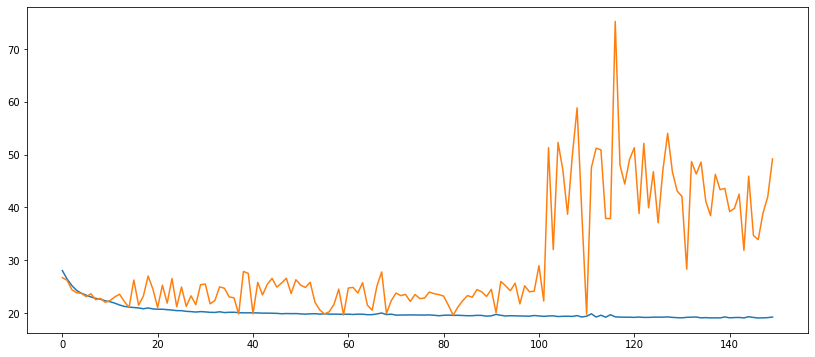

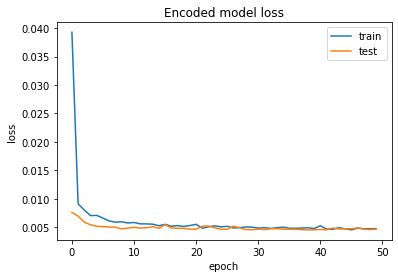

Overall accuracy of Convolutional Neural Network model: 0.9992696731787475


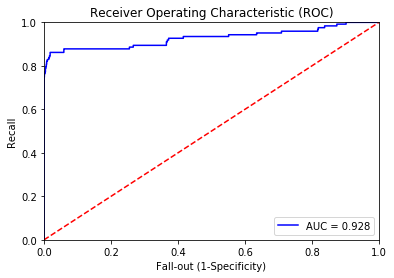

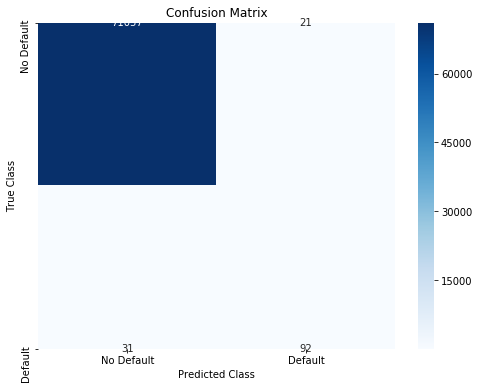

AUC(ROC): 0.8738360148029292
Precision: 0.8141592920353983
Recall: 0.7479674796747967
F1 score: 0.7796610169491525
False positives: 21
True positives: 92
False negatives: 31
True negatives: 71057


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 10 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    #print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    #print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    #sm = SMOTE(random_state=2)
    #X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    #print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    #print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    #print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    #print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = x_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(x_train, x_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = " + str(Average_precision))

print("Average Recall = " + str(Average_recall))

print("Average F1 score = " + str(Average_f1_score))

Average tn = 71059.25
Average fp = 19.5
Average fn = 28.5
Average tp = 94.5
Average Precision = 0.8289473684210527
Average Recall = 0.7682926829268293
Average F1 score = 0.7974683544303798


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 284237
Total fp: 78
 Total fn:114
 Total tp:378
Total Precision = 0.8289473684210527
Total Recall = 0.7682926829268293
Total F1_score = 0.7974683544303798
